# Performing machine learning models on the camping data of last 12 months

In [5]:
#importing the required library for the model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#converting the csv file to pandas DataFrame
data = pd.read_csv("data.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11440776 entries, 0 to 11440775
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CustID              object 
 1   status              object 
 2   Campaign_Exec_Date  object 
 3   Campaign_Channel    object 
 4   Gender              object 
 5   Pincode             object 
 6   State               object 
 7   SaleValue           float64
 8   OrderedQuantity     int64  
 9   OrderDate           object 
 10  month_difference2   int64  
 11  outcome             int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.0+ GB


In [4]:
#Removing the unwanted columns from the data frame
data.drop("Unnamed: 0",axis=1,inplace=True)
data.drop("month_difference2",axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11440776 entries, 0 to 11440775
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CustID              object 
 1   status              object 
 2   Campaign_Exec_Date  object 
 3   Campaign_Channel    object 
 4   Gender              object 
 5   Pincode             object 
 6   State               object 
 7   SaleValue           float64
 8   OrderedQuantity     int64  
 9   OrderDate           object 
 10  outcome             int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 960.1+ MB


In [9]:
#sum of unique values in the outcome column
data['outcome'].value_counts()

outcome
0    9224947
1    2215829
Name: count, dtype: int64

In [13]:
data.head()

,CustID,status,Campaign_Exec_Date,Campaign_Channel,Gender,Pincode,State,SaleValue,OrderedQuantity,OrderDate,outcome
0,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2020-01-13,Email,Not available,410221.0,Maharashtra,24725.106,1,2020-11-05,0
1,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2020-01-13,Email,Not available,410221.0,Maharashtra,1504.500,1,2020-11-05,0
2,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2020-01-13,Email,Not available,410221.0,Maharashtra,1463.292,1,2020-11-05,0
3,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2020-01-13,Email,Not available,410221.0,Maharashtra,268.464,1,2020-11-05,0
4,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2020-01-13,Email,Not available,410221.0,Maharashtra,-24725.106,-1,2020-11-06,0


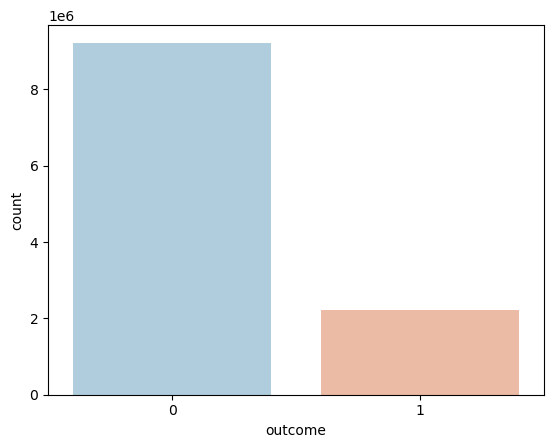

In [59]:
#comparision between the values
sns.countplot(data=data,x='outcome',palette='RdBu_r')
plt.show()

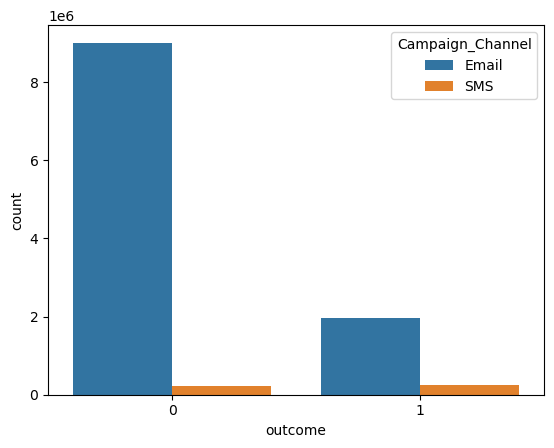

In [60]:
sns.countplot(data=data,x='outcome',hue='Campaign_Channel')
plt.show()

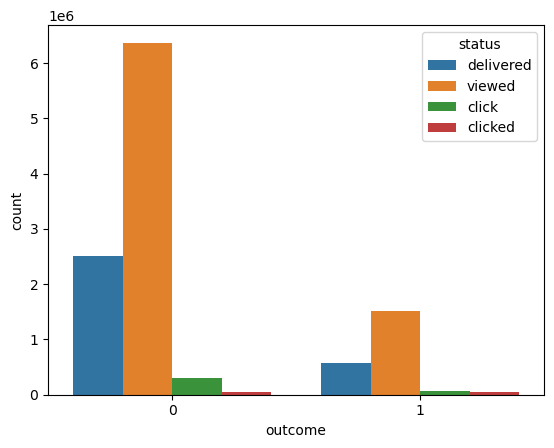

In [61]:
sns.countplot(data=data,x='outcome',hue='status')
plt.show()

In [15]:
#importing the LabelEncoder for converting the text data into numeric
from sklearn.preprocessing import LabelEncoder

In [16]:
#creating an object for LabelEncoder
lbe = LabelEncoder()

In [17]:
data.columns

Index(['CustID', 'status', 'Campaign_Exec_Date', 'Campaign_Channel', 'Gender',
       'Pincode', 'State', 'SaleValue', 'OrderedQuantity', 'OrderDate',
       'outcome'],
      dtype='object')

In [19]:
data.head()

,CustID,status,Campaign_Exec_Date,Campaign_Channel,Gender,Pincode,State,SaleValue,OrderedQuantity,OrderDate,outcome
0,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2020-01-13,Email,Not available,410221.0,Maharashtra,24725.106,1,2020-11-05,0
1,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2020-01-13,Email,Not available,410221.0,Maharashtra,1504.500,1,2020-11-05,0
2,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2020-01-13,Email,Not available,410221.0,Maharashtra,1463.292,1,2020-11-05,0
3,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2020-01-13,Email,Not available,410221.0,Maharashtra,268.464,1,2020-11-05,0
4,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2020-01-13,Email,Not available,410221.0,Maharashtra,-24725.106,-1,2020-11-06,0


In [22]:
#dividing the data into two variable for train test
x = data.iloc[:,:-1]

In [24]:
y = data.iloc[:,-1]

In [26]:
x.drop("CustID",axis=1,inplace=True)

In [27]:
#converting the string to numeric
x['status'] = lbe.fit_transform(x['status'])

In [28]:
x['Campaign_Exec_Date'] = lbe.fit_transform(x['Campaign_Exec_Date'])

In [29]:
x['Campaign_Channel'] = lbe.fit_transform(x['Campaign_Channel'])

In [30]:
x['Gender'] = lbe.fit_transform(x['Gender'])

In [31]:
x['State'] = lbe.fit_transform(x['State'])

In [32]:
x['OrderDate'] = lbe.fit_transform(x['OrderDate'])

In [33]:
x.head()

,status,Campaign_Exec_Date,Campaign_Channel,Gender,Pincode,State,SaleValue,OrderedQuantity,OrderDate
0,2,9,0,2,410221.0,20,24725.106,1,309
1,2,9,0,2,410221.0,20,1504.500,1,309
2,2,9,0,2,410221.0,20,1463.292,1,309
3,2,9,0,2,410221.0,20,268.464,1,309
4,2,9,0,2,410221.0,20,-24725.106,-1,310


In [45]:
x.drop("Pincode",axis=1,inplace=True)

In [47]:
#importing the traintest model
from sklearn.model_selection import train_test_split

In [48]:
#assigning the values of xtrain, xtest,ytrain,ytext at the ration of 80:20
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [49]:
len(xtrain)

9152620

In [50]:
len(xtest)

2288156

In [51]:
#as the data is a categorical data so i have use logisticRegression for the pedicting the values
from sklearn.linear_model import LogisticRegression

In [52]:
#creating a object for LogisticRegression
logreg = LogisticRegression()

In [53]:
#trainging the data
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [54]:
#predicting the data
ypred = logreg.predict(xtest)

In [55]:
#importing the reports for the data which is predicted
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [56]:
ac = accuracy_score(ytest,ypred)
print(f'Accuracy score is {ac}')

Accuracy score is 0.9910106653567327


In [57]:
cm = confusion_matrix(ytest,ypred)
print(cm)

[[1835165    8704]
 [  11865  432422]]


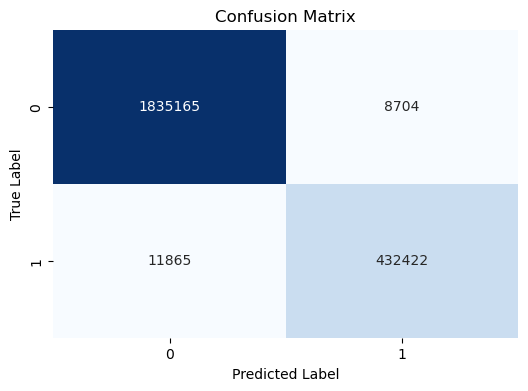

In [72]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [74]:
cr1 = classification_report(ytest,ypred)
cr = classification_report(ytest,ypred,output_dict=True)
data_report = pd.DataFrame(cr)
print(cr1)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99   1843869
           1       0.98      0.97      0.98    444287

    accuracy                           0.99   2288156
   macro avg       0.99      0.98      0.99   2288156
weighted avg       0.99      0.99      0.99   2288156



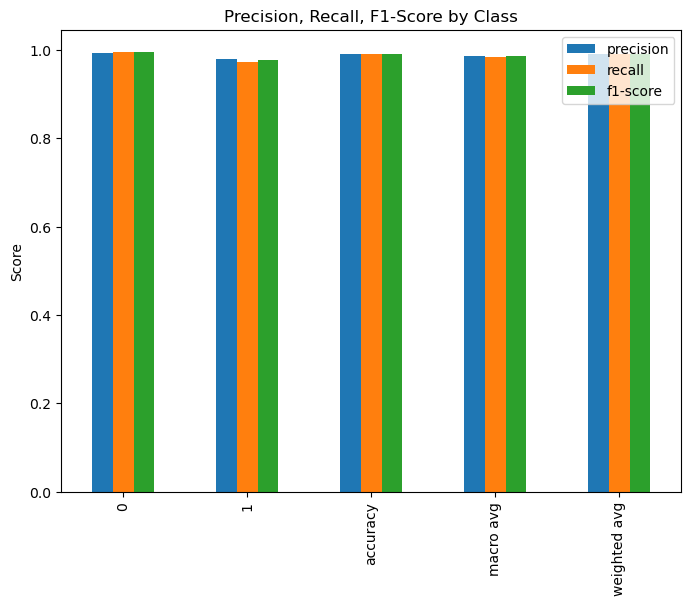

In [75]:
# Bar plot of precision, recall, f1-score
data_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 6))
plt.title('Precision, Recall, F1-Score by Class')
plt.ylabel('Score')
plt.show()

In [77]:
#training and testing score for checking overfit and underfit
training = logreg.score(xtrain,ytrain)
testing = logreg.score(xtest,ytest)

print(f'Training Score is {training}')
print(f'Testing Score is {testing}')

Training Score is 0.9909956930365295
Testing Score is 0.9910106653567327
